<center>
    <img src="./images/msp_header.png">
</center>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta

# Non-Ideal Filters

In [1]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/wdFrdt3m0BU" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

We saw that we can get perfect reconstruction in a filter bank, using ideal filters (ideally we remove all aliasing components). But in practice, we don't have ideal filters, they are not realizable, because their impulse response stretches from minus infinity to infinity.

How can we obtain **perfect reconstruction** using realizable **non-ideal filters**, and still "**critical sampling**" (meaning the down sampling rate N is equal to the number of sub bands, as in the case of ideal filters)? Let's first take a look at the resulting spectrum when we use non-ideal filters. We start with the spectrum at the output of a non-ideal high-pass,

<center>
    <img src="./images/Lecture9-1.png" width=600>
</center>

In [2]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/0E0vttSUhDU" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

Observe that the slope at $\dfrac{\pi}{2}$ and $\dfrac{-\pi}{2}$ is not infinite, but we get a more or less slow transition into higher attenuation towards lower frequencies. Hence we also get frequencies below $\dfrac{\pi}{2}$ (or above $\dfrac{-\pi}{2}$) in our signal. This will become a problem after downsampling by a factor of 2 (for now just the multiplication with the delta impulse train), as can be seen in the next pictures. Remember that for the multiplication with the delta train we get aliasing components at frequency shifts of $\dfrac{2\pi}{N}$, hence in this case $\pi$,

<center>
    <img src="./images/Lecture9-2.png" width=600>
</center>

Observe, even if we now used ideal filters for the synthesis for the high-pass part, we would still have the **overlapped aliasing component**, and hence no perfect reconstruction.

## Filter Banks

In [3]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/OON4olsZxbk" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

Filter banks consist of a bank of subbband filters which cover the entire frequency band of our signal, followed by downsampling in the analysis filter bank, and preceded by upsampling in the synthesis filter bank. This can be seen in the following pictures,

<center>
    <img src="./images/Lecture9-3.png" width=600>
</center>

<center>
    <img src="./images/Lecture9-4.png" width=600>
</center>

In the picture, $x(n)$ is the input signal (for instance our audio signal), $y_k(m)$ are the downsampled subband signals (with k the subband index and m the index at the lower sampling rate), and $\hat{x}(n)$ is the reconstructed signal.

As described in lecture 2, $\downarrow N$ Symbolizes downsampling by a factor of N (including removal of the zeros). If $x(n)$ is the signal we downsample, then we also write the downsampled signal as

$$\large
x^{\downarrow N}_{n_0}(m) :=x( mN+n_0 )
$$

where $n_0$ is the index of the first sample we keep in the downsampling, or the “**phase**”, with $0\leq n_0\leq N-1$.

$\uparrow N$symbolizes upsampling by a factor of N, including insertion of the zeros. If $y(m)$ is the signal we upsample, then we also write the upsampled signal as

$$\large
y^{ \uparrow N }_{ n_0 }(n) = \begin{cases}
        \begin{split}
            y(m),          & n=mN+n_0 \\
              0, & else \\
         \end{split}
    \end{cases}
$$

where $n_0$ is the index of the first non-zero sample in the upsampled signal, or the phase, with
$0\leq n_0 \leq N-1$.

So the only hope we have to **obtain perfect reconstruction** with non-ideal filters (and still critical sampling) in filter banks, is that somehow the aliasing from different subbands cancels out during the synthesis process, when we add up all the subbands (if we add e.g. the low pass signal and the high pass signal for the reconstruction); or in other words, we would like the sum of all aliasing components at the output of the synthesis filters to become zero. The question now is: how do we obtain this goal?

In [4]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/q-H7xff6fcI" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

We could now analyse all the aliasing components, to find out when they cancel each other. This is how researchers actually approached this problem first, for instance in the first derivation of the so-called Time-Domain Aliasing Cancellation (TDAC) filter banks by Princen and Bradley <cite>( J. P. Princen, A. W. Johnson und A. B. Bradley: Subband/transform coding using filter bank designs based on time domain aliasing cancellation, IEEE Proc. Intl. Conference on Acoustics, Speech, and Signal Processing (ICASSP))</cite>,

or using the aliasing component matrices by Vetterli et al.
But it turned out that a simpler mathematical approach is possible by just using the goal of overall perfect reconstruction of our filter bank, regardless of all aliasing components. This is now the goal of the following derivation. Here we need to analyse in more detail what happens in the filtering and downsampling process in our filter bank.

To come to a solution, we need to **apply the z-transform** to our filter bank with non-ideal filters. 

### Analysis Filter Bank

In [5]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/j90eowFD2l4" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

<center>
    <img src="./images/Lecture9-5.png" width=600>
</center>

Just the filtering can be written with the convolution equation,

$$\large
y(n')= \sum _{n=0} ^ {L-1} x(n'-n) h_k(n)
$$

The filtering and subsequent **downsampling** by N of the k'th analysis filter $h_k(n)$ of impulse response length L can be written as a downsampled convolution sum with phase offset $n_0$, simply with the substitution $mN+n_0 \rightarrow n'$ (and have the new argument $m$ of y)
          $y^{\downarrow N}_{n_0}(m)= \sum _ {n=0 }^ {L-1} x(mN+n_0-n) h_k(n)$ (2)
          
          
(see also lecture 1) where m is again the downsampled index (at the lower sampling rate). $n_0$ Is our **phase index** for the downsampling. Often we assume $n_0=0$, which means we start downsampling at the first sample (keeping the first sample). 

In this way the sum only computes the values which the donwsampler keeps. The downsampling in this equation is now the hurdle to simply applying the z-transform to turn the convolution into a multiplication, for easy invertibility. 

### Block Transforms

To look for a solution for invertibility, perfect reconstruction and alias cancellation, we now take a detour to fast implementations, using transforms, like the **DFT** and its fast implementation, the FFT. This is also the approached used by the Short Time Fourier Transform (**STFT**). If we **divide our signal** into **blocks** of length N, 

$$\large
\boldsymbol x (m)=[x(mN),x(mN+1), ..., x(mN+N-1)]
$$

$$\large
=[ x^{\downarrow N}_{0}(m),...,x^{\downarrow N}_{N-1}(m) ]
$$

where m is the block index or index at the lower sampling rate. You can imagine the signal as a long horizontal sequence of samples, which we subdivide into small blocks of length N. We then stack those blocks on top of each other. Then going vertically down, we obtain downsampled versions of our signal at different phase lags,

<center>
    <img src="./images/Lecture9-6.png" width=500>
</center>

The DFT computes a block with N frequency or subband values for each **signal block** $\boldsymbol{x}(m)$.

If $\boldsymbol{T}$ is the DFT transform matrix, then the DFT of each signal block is

$$\large
\boldsymbol y(m)=\boldsymbol x(m)\cdot \boldsymbol T$$

where $\boldsymbol y(m)$ contains the DFT coefficients,

$$\large
\boldsymbol y (m) :=[y_0(m), y_1(m),...,y_{N-1}(m)]
$$

Here, $y_k$(m) is the $k$'th DFT coefficient for block $m$. Hence index $k$ denotes the subband or frequency, and index $m$ is the block index or time at the lower sampling rate.

Hence, if we keep $k$ fixed we obtain a time signal, for the $k'th$ subband. If we keep m fixed, we obtain a spectrum for block m.

That is why this is also called a “time/frequency” representation, since we have both, time (m)  and frequency (k) indices in it.

This shows that the DFT is simply a special case of an analsys filter bank with critical sampling (and perfect reconstruction through the inverse DFT).

#### Python Example:

In [6]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/A4Ik_Io2JrA" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [7]:
# Imports and Configuration

%matplotlib notebook
import pyaudio
import numpy as np
import scipy.signal as signal
import struct
import matplotlib.pyplot as plt
from matplotlib.mlab import window_hanning,specgram
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter, MultipleLocator
from ipywidgets import ToggleButton, Checkbox, Button
from ipywidgets import HBox, interact
import threading

In [8]:
# Parameters
CHUNK_SIZE = 2048 #Blocksize
CHANNELS = 1 # Audio Channes
RATE = 32000  #Sampling Rate in Hz
N=8.0     #Downsampling/Upsampling Rate
FORMAT = pyaudio.paInt16 #conversion format for PyAudio stream
NFFT = 1024 #NFFT value for spectrogram
OVERLAP = 512 #overlap value for spectrogram

In [9]:
# LP Filter
[b,a]=signal.iirfilter(8, 1900.0/16000,rp=60,btype='lowpass')
#Memory for the filter:
zd=np.zeros(8)
zu=np.zeros(8)
LPFilterOn=False

# LP Filter Frequency Response
w, h = signal.freqz(b,a)
f = w*16000/(np.pi)

In [10]:
# Function to Plot Spetrogram
SamplingOn=False # Turn Donwsampling/Upsampling On/Off
ctr=0 # Control for plotting
def run_spectrogram(toggle_run):
    global zd, zu, ctr, SamplingOn, LPFilterOn
    while(True):
        if toggle_run.value==True:
            break
            
        #Reading from audio input stream into data with block length "CHUNK":
        data_stream = stream.read(CHUNK_SIZE)
        shorts = (struct.unpack( 'h' * CHUNK_SIZE, data_stream ));
        samples=np.array(list(shorts),dtype=float);

        #start block-wise signal processing:
        #Low pass filter *before downsampling*:
        if LPFilterOn==True:
            [samples,zd]=signal.lfilter(b, a, samples, zi=zd)

        #Compute a block/an array of a unit pulse train corresponding a downsampling rate of N:
        #make unit pulse train with modulus function "%": 
        s=(np.arange(0,CHUNK_SIZE)%N)==0
        #The sampling:
        #multiply the signal with the unit pulse train:
        if SamplingOn == True:
            samples=samples*s;


        #Lowpass filtering *after upsampling*:
        #filter function:
        if LPFilterOn==True:
            [samples,zu]=signal.lfilter(b, a, samples, zi=zu)

        #end signal processing

        #play out samples:
        samples=np.clip(samples, -32000,32000)
        samples=samples.astype(int)
        #converting from short integers to a stream of bytes in "data":
        data=struct.pack('h' * len(samples), *samples);
        #Writing data back to audio output stream: 
        stream.write(data, CHUNK_SIZE)

        # Update Plot
        if (ctr%4 ==0):
            arr2D,freqs,bins = specgram(samples,window=window_hanning,
                                        Fs = RATE,NFFT=NFFT,noverlap=OVERLAP)
            im_data = im.get_array()
            if ctr < 16:
                im_data = np.hstack((im_data,arr2D))
                im.set_array(im_data)
            else:
                keep_block = arr2D.shape[1]*(16 - 1)
                im_data = np.delete(im_data,np.s_[:-keep_block],1)
                im_data = np.hstack((im_data,arr2D))
                im.set_array(im_data)
            fig.canvas.draw()
        ctr+=1

In [11]:
# GUI
toggle_run = ToggleButton(description='Stop')
button_start= Button(description='Start')
box_sampling = Checkbox(False, description='Downsampling/Upsampling')
box_LPFilter = Checkbox(False, description='LP Filters')

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        stream.stop_stream()
        stream.close()
        p.terminate()
        plt.close()
toggle_run.observe(on_click_toggle_run, 'value')

def box_samping_changed(box_sampling):
    global SamplingOn
    if box_sampling['new']: 
        SamplingOn=True
    else:
        SamplingOn=False       
box_sampling.observe(box_samping_changed, names='value')

def box_LPFilter_changed(box_LPFilter):
    global LPFilterOn
    if box_LPFilter['new']: 
        LPFilterOn=True
    else:
        LPFilterOn=False       
box_LPFilter.observe(box_LPFilter_changed, names='value')

box_buttons = HBox([button_start,toggle_run])
box_checkbox = HBox([box_sampling,box_LPFilter])

In [12]:
# Create a Thread for run_spectrogram function
thread = threading.Thread(target=run_spectrogram, args=(toggle_run,))

In [13]:
# Start Audio Stream
# Create 
p = pyaudio.PyAudio()
    
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                frames_per_buffer=CHUNK_SIZE)



input_data = stream.read(CHUNK_SIZE)
samples = np.frombuffer(input_data,np.int16)

<IPython.core.display.Javascript object>


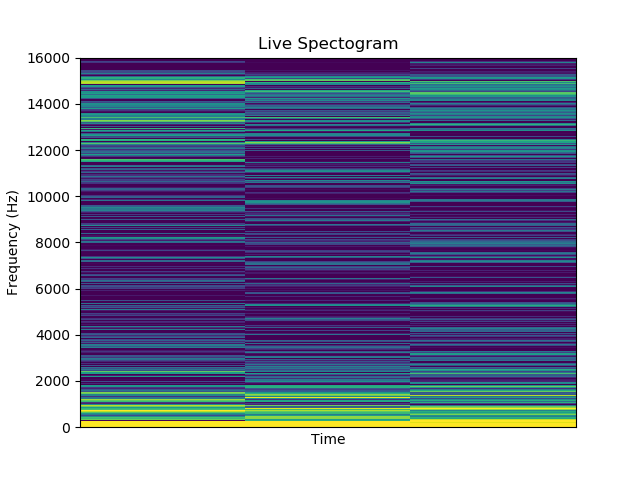

In [14]:
# Initialize Plot and Display GUI

display(box_buttons)
display(box_checkbox)

fig, ax = plt.subplots()
arr2D,freqs,bins = specgram(samples,window=window_hanning,
                                Fs = RATE,NFFT=NFFT,noverlap=OVERLAP)


extent = (bins[0],bins[-1]*32,freqs[-1],freqs[0])
im = plt.imshow(arr2D,aspect='auto',extent = extent,interpolation="none",
                     norm = LogNorm(vmin=.01,vmax=1))
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.title('Live Spectogram')
plt.gca().invert_yaxis()
plt.xticks([])

def handle_close(evt):
    # When everything done, release the capture
    stream.stop_stream()
    stream.close()
    p.terminate()
    plt.close()
plt.connect('close_event', handle_close);

### Fast Implementation

In [16]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/eGXhSd0UorA" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

As the name says, the FFT has a fast implementation. Compare it to our filter bank: per subband we need to calculate the convolution sum. If we have filters of length L, that means we have L multiplications per output sample (we neglect the sum operations) for each sub band. Without down samplers, we get LN multiplications for each block of N input samples for each subband, leading to $LN^2$ multiplications for all subbands for the block of N input samples. 

Now we can reduce this amount by only computing the output samples which the downsampler keeps. This reduces the computational complexity by a factor of N, resulting in LN multiplications for each input block of length N, to obtain N output values (1 value in each subband). In other words: each sample in a subband is computed by a filter of length L which needs L multiplications in the convolution sum. We need L multiplications per sample.

If we compare it with an FFT, it only needs on the order of $Nlog_2(N)$ multiplications (“order” meaning: up to a fixed factor) for each block. Hence for each subband sample we need log(N) multiplications. Compare this with the L multiplications per sample for the critically sampled filter bank.

Since usually we have $L>log_2(N)$, this is **more efficient**.

**Example:** If N=1024 subbands, then we need filters which are longer than L=1024, and $L>>log_2( 1024 )=10$
. Hence in this case, we save more than an order of a factor of 100 in complexity using the FFT!

Another interesting effect is, that we obtain **perfect reconstruction** using the **inverse FFT** for the synthesis process, even though the equivalent FFT filter bank has no perfect filters. So this might give us a hint on how to obtain perfect reconstruction without ideal filters.

The question is, what is the **equivalent FFT filter bank**?